In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor # For regression task
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,recall_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("diabetes.csv") 
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0
...,...,...,...,...,...,...,...,...,...
1995,2,75,64,24,55,29.7,0.370,33,0
1996,8,179,72,42,130,32.7,0.719,36,1
1997,6,85,78,0,0,31.2,0.382,42,0
1998,0,129,110,46,130,67.1,0.319,26,1


In [3]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [5]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

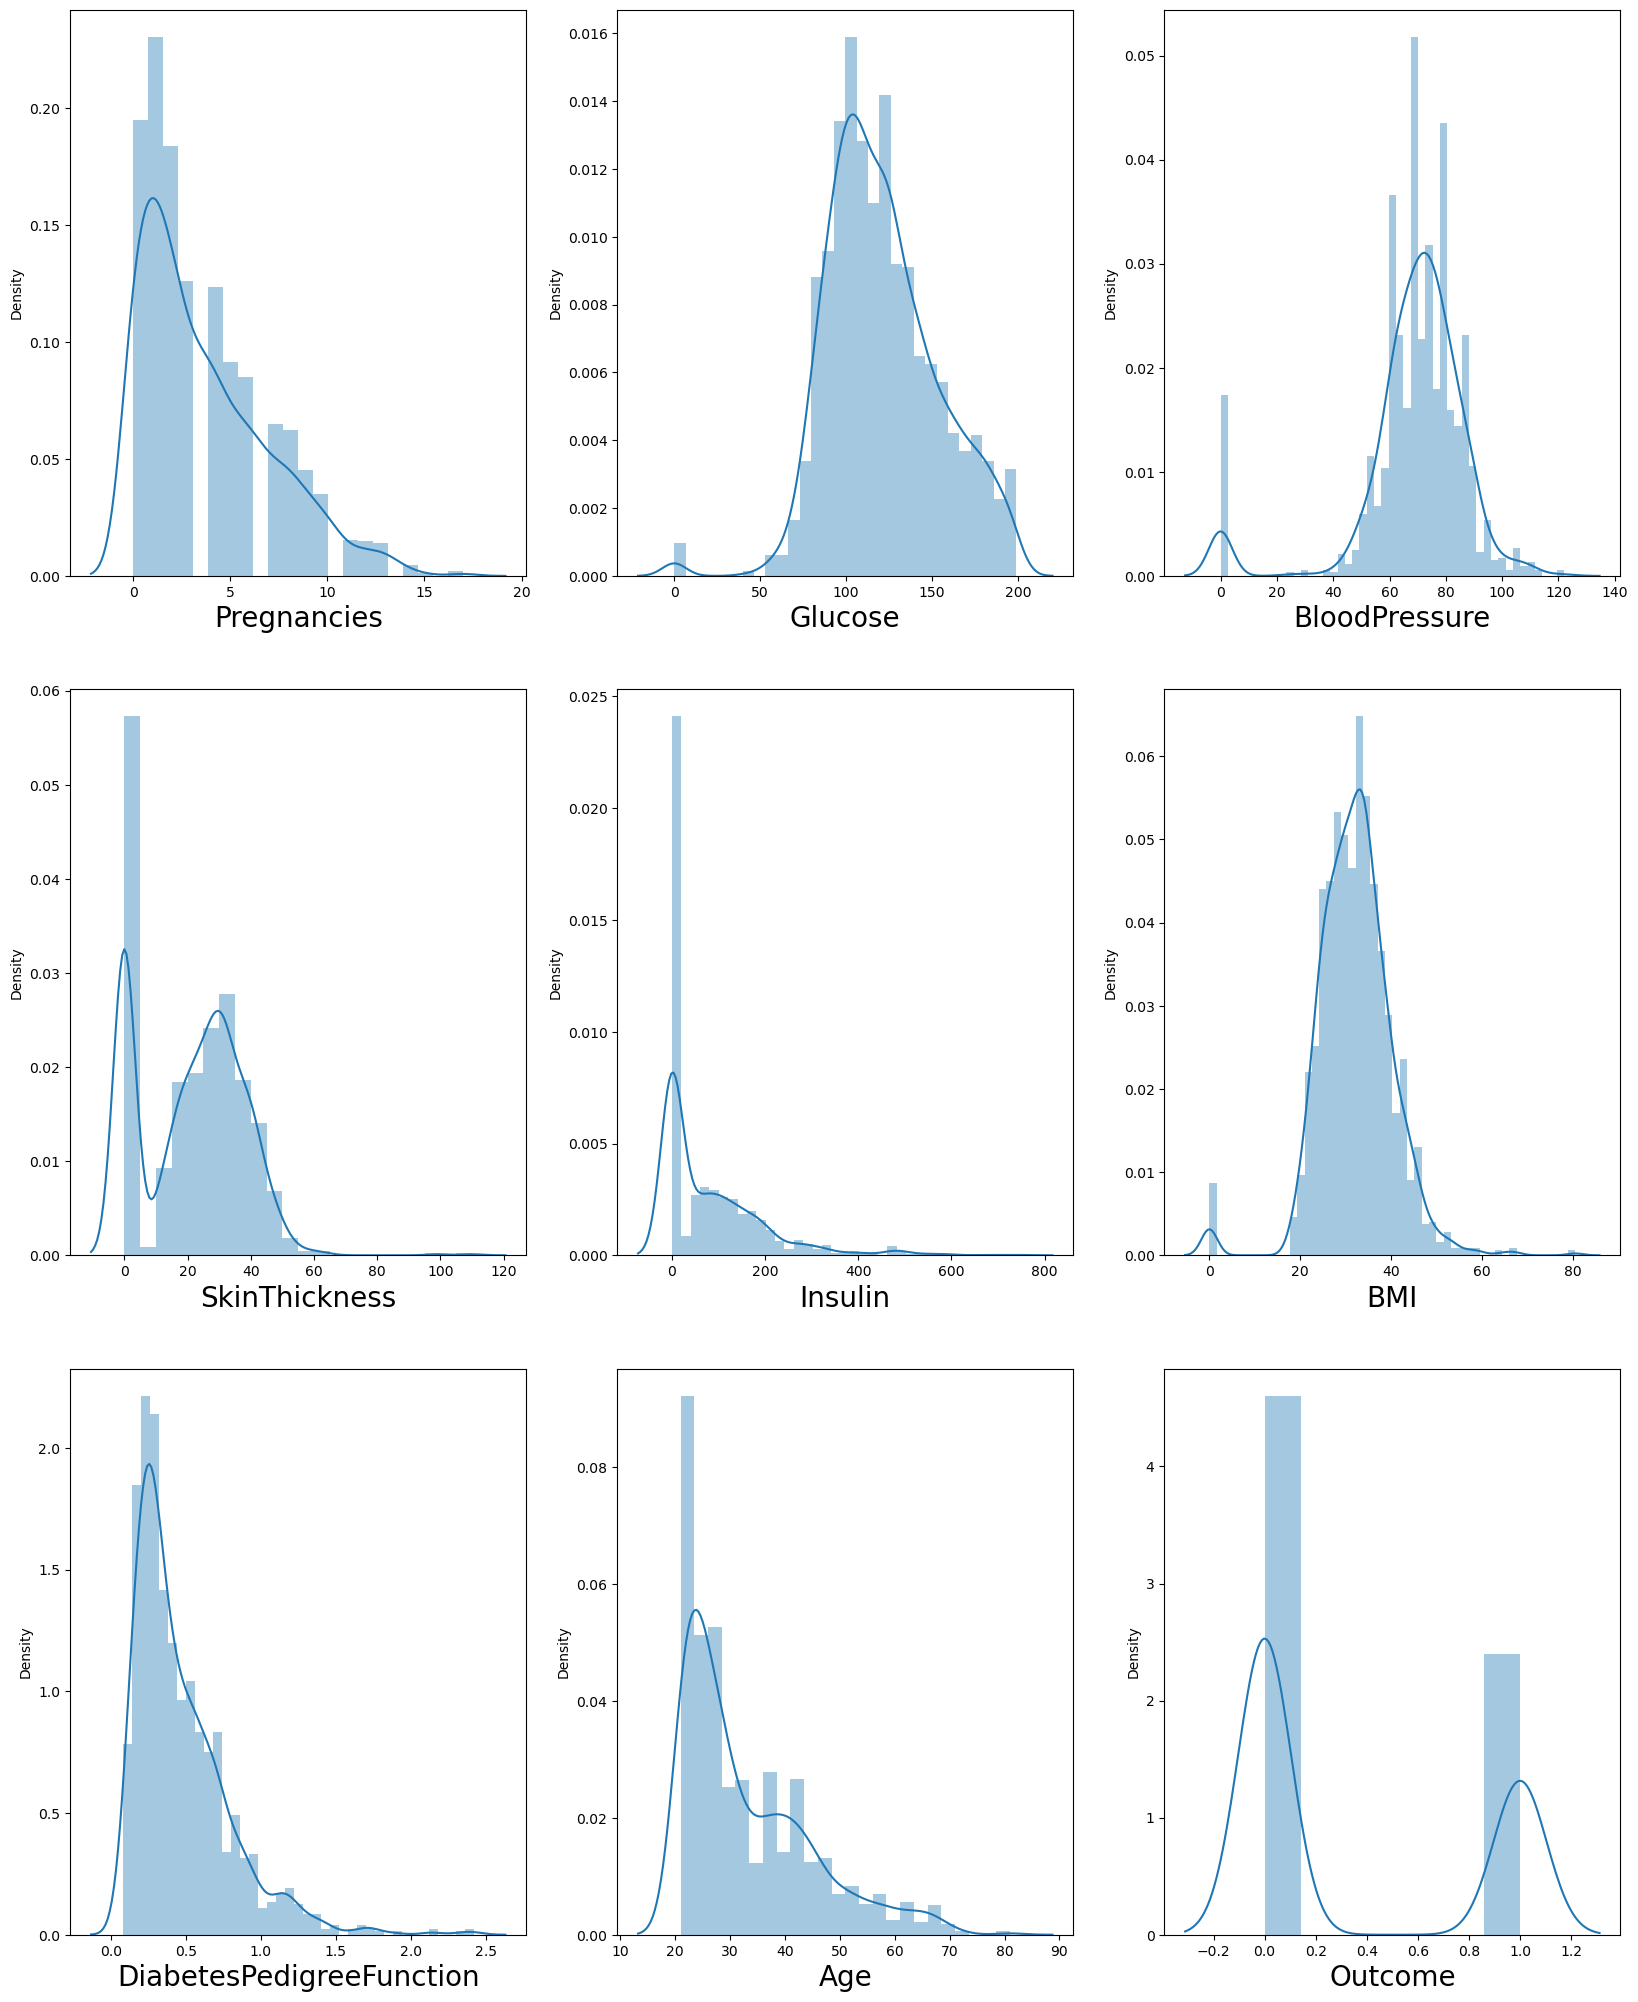

In [6]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber=1
for column in data:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()


In [7]:
for i in np.where(data['BloodPressure']==0):
    print(i)  #checking where the bloodpressure is zero

[   2   12   49   60   78   81  172  193  222  261  266  269  300  332
  336  347  357  426  430  435  453  468  484  494  522  533  535  589
  601  604  619  643  697  703  706  770  802  806  817  827  896  900
  905  923  938  954  964  990  992 1046 1058 1061 1076 1100 1154 1160
 1163 1227 1330 1351 1380 1419 1424 1427 1485 1489 1494 1512 1527 1543
 1553 1568 1576 1591 1600 1610 1679 1683 1689 1692 1707 1731 1785 1791
 1794 1870 1881 1899 1902 1993]


In [8]:
data['BMI']=data['BMI'].replace(0,data['BMI'].median())
data['BloodPressure']=data['BloodPressure'].replace(0,data['BloodPressure'].median())
data['Glucose']=data['Glucose'].replace(0,data['Glucose'].median())
data['Insulin']=data['Insulin'].replace(0,data['Insulin'].median())
data['SkinThickness'] = data['SkinThickness'].replace(0,data['SkinThickness'].median())

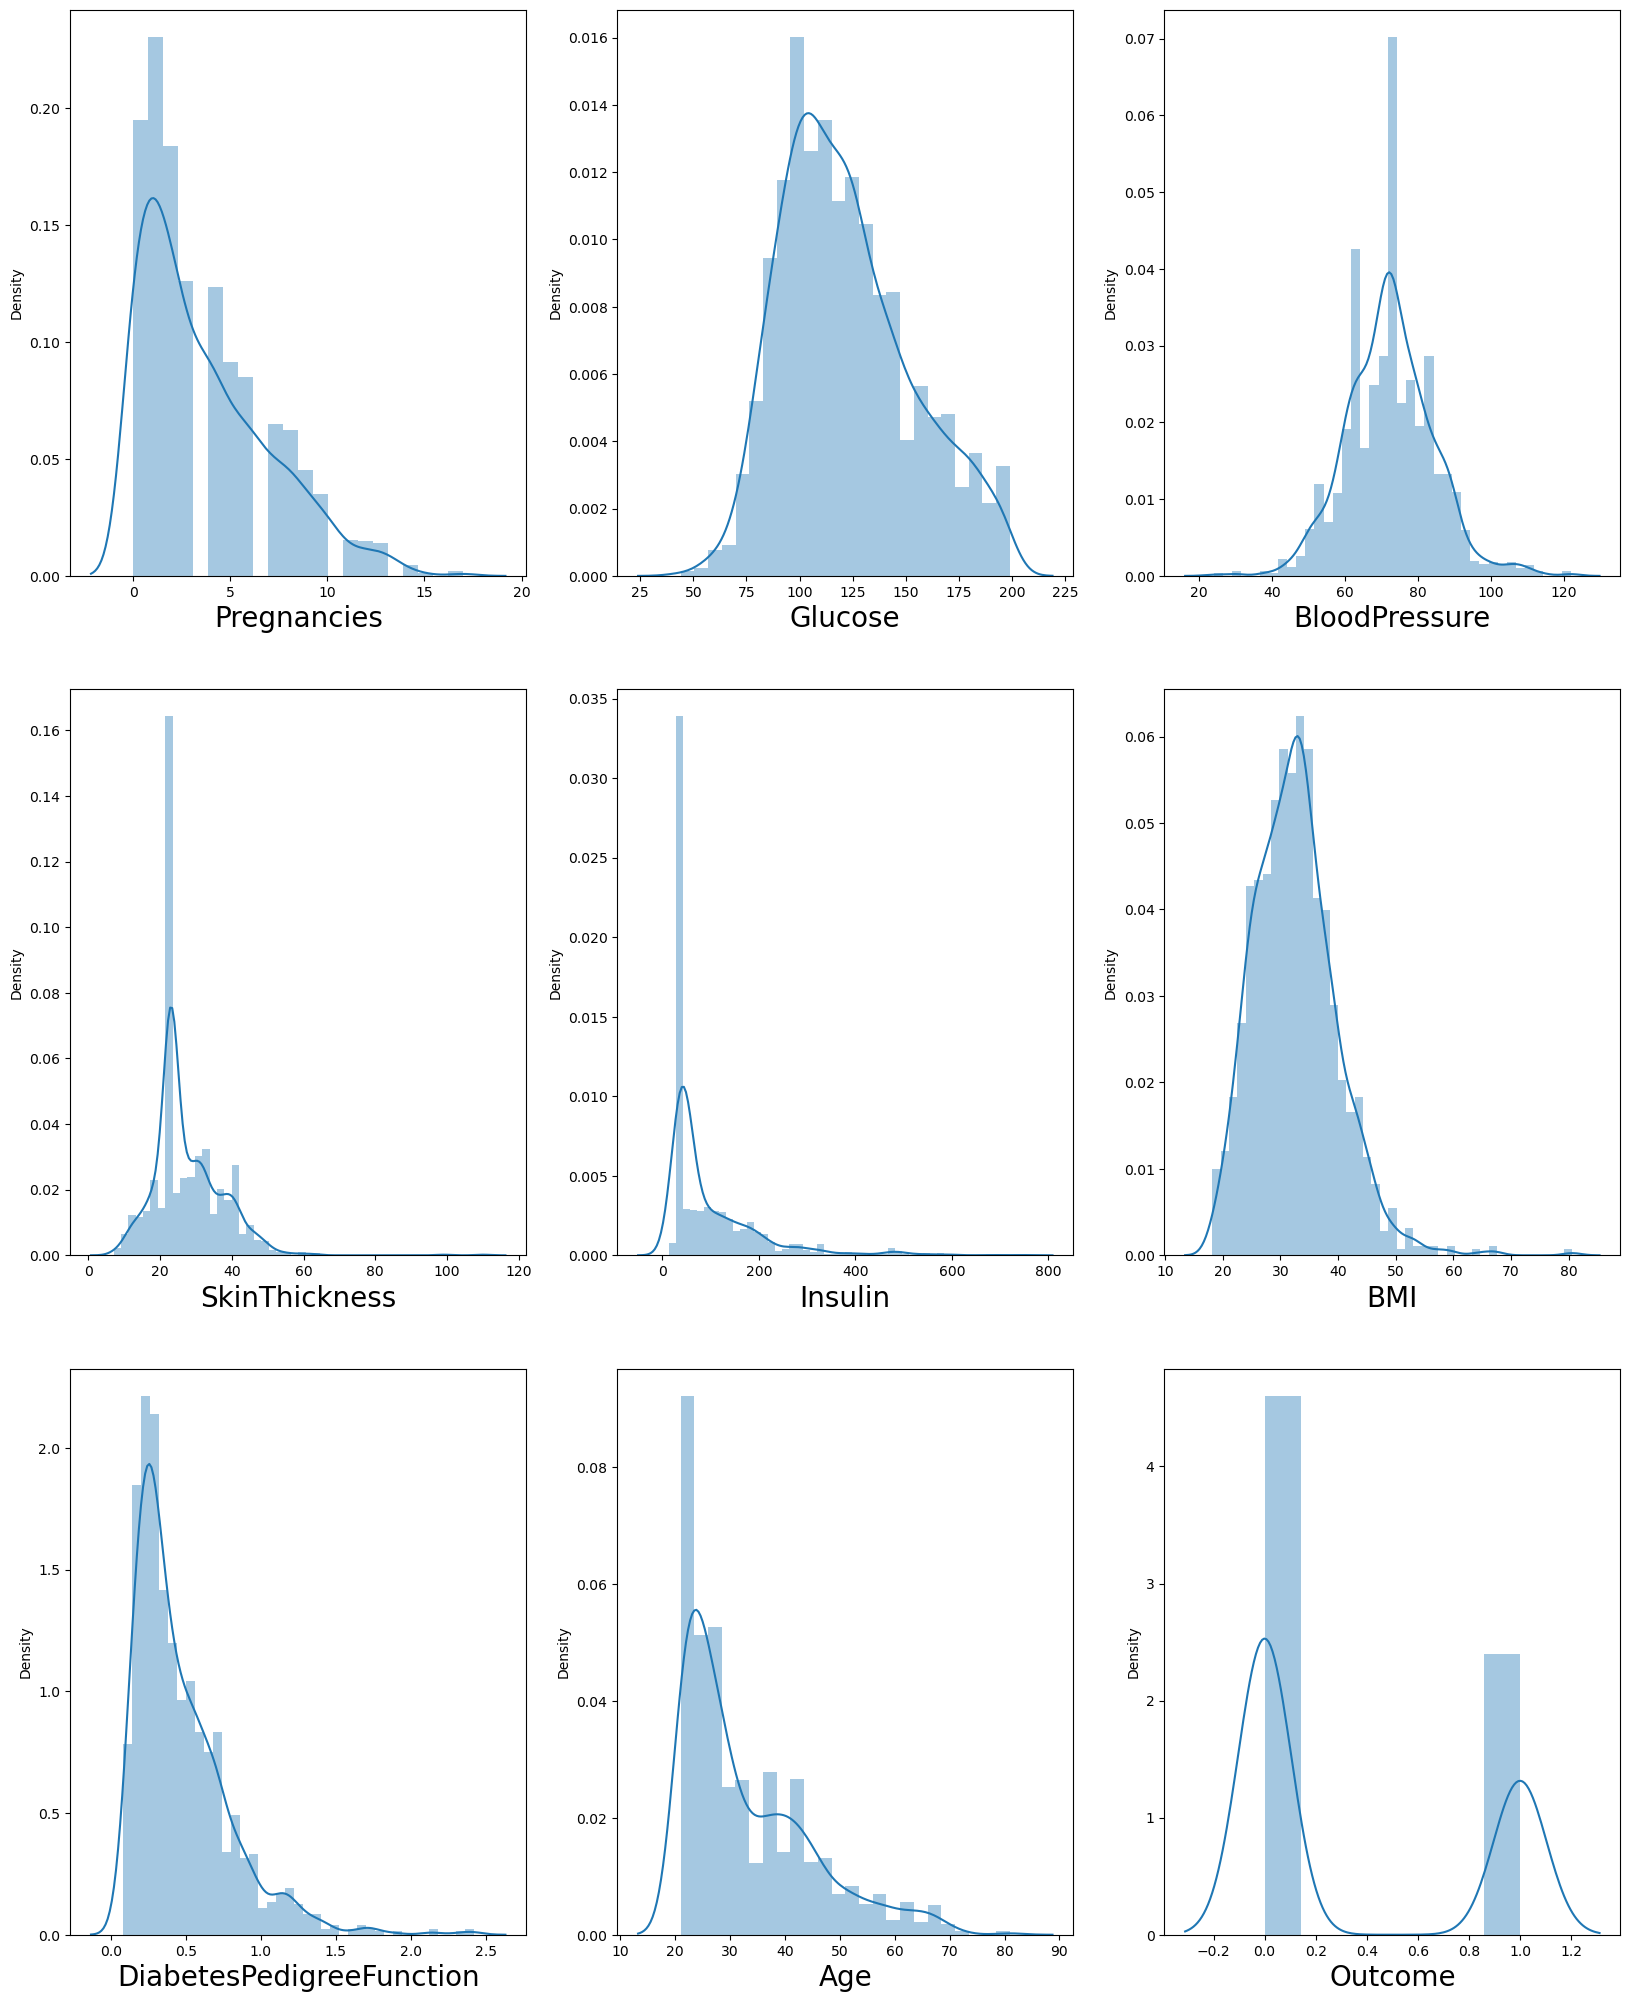

In [9]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in data:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()
    

In [10]:
#split X and Y
X=data.drop(columns = ['Outcome'])
y=data['Outcome']

In [11]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,2,138,62,35,40,33.6,0.127,47
1,0,84,82,31,125,38.2,0.233,23
2,0,145,72,23,40,44.2,0.630,31
3,0,135,68,42,250,42.3,0.365,24
4,1,139,62,41,480,40.7,0.536,21
...,...,...,...,...,...,...,...,...
1995,2,75,64,24,55,29.7,0.370,33
1996,8,179,72,42,130,32.7,0.719,36
1997,6,85,78,23,40,31.2,0.382,42
1998,0,129,110,46,130,67.1,0.319,26


In [12]:
## scaling the data
scalar = StandardScaler() #Zscore formula is used and range is -3 to 3.standardscaler is only used for continuous data and use for standardization
#here trained data means xtrain
X_scaled = scalar.fit_transform(X) #fit transform method is used only for training data and fit transform is used for calculation (formula) and transform method is used for testing data

In [13]:
X_scaled

array([[-0.5153943 ,  0.52597447, -0.86930967, ...,  0.13282408,
        -1.06324616,  1.18042417],
       [-1.12049474, -1.24288779,  0.80477375, ...,  0.77273898,
        -0.7355513 , -0.85632626],
       [-1.12049474,  0.75527143, -0.03226796, ...,  1.60741059,
         0.49175869, -0.17740945],
       ...,
       [ 0.69480658, -1.21013108,  0.46995707, ..., -0.20104457,
        -0.27492362,  0.75610116],
       [-1.12049474,  0.23116409,  3.14849054, ...,  4.79307391,
        -0.46968566, -0.60173245],
       [-0.5153943 , -1.34115792, -0.03226796, ..., -0.3540677 ,
         0.23516743, -0.68659705]])

In [14]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,random_state=42)

In [15]:
error_rate = []

# Will take some time
for i in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test)) 


In [16]:
error_rate

[0.036, 0.116, 0.16, 0.194, 0.194, 0.212, 0.2, 0.22, 0.196, 0.196]

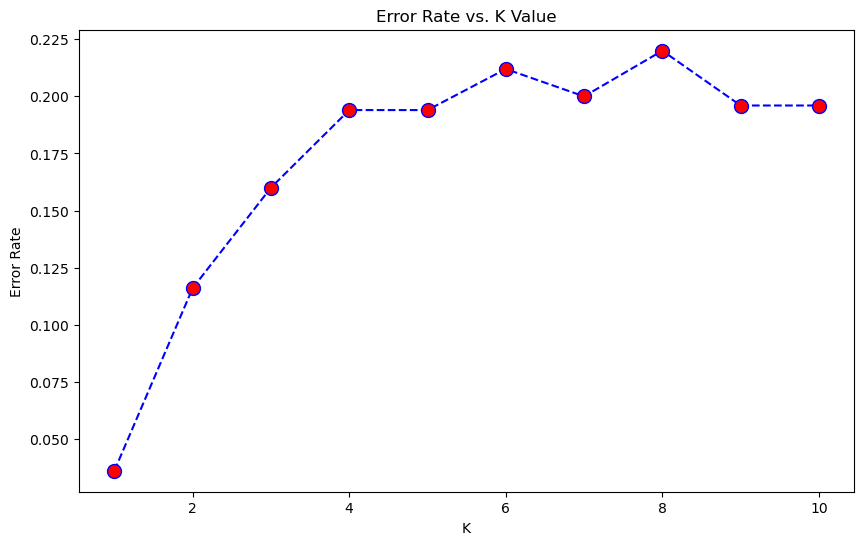

In [17]:
plt.figure(figsize=(10,6))
plt.plot(range(1,11),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [23]:
knn1 = KNeighborsClassifier(n_neighbors=3)
knn1.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [24]:
y_pred=knn1.predict(X_test)

In [25]:
print("Accuracy score is",accuracy_score(y_test,y_pred))

Accuracy score is 0.84


In [26]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.88      0.88       320
           1       0.78      0.77      0.78       180

    accuracy                           0.84       500
   macro avg       0.83      0.82      0.83       500
weighted avg       0.84      0.84      0.84       500



In [27]:
recall=recall_score(y_test,y_pred)
recall

0.7666666666666667

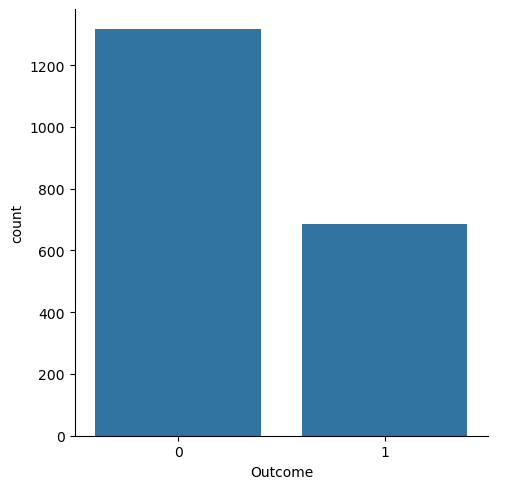

In [28]:
#checking the balance of target
sns.catplot(x='Outcome',kind='count',data=data)

In [30]:
data.Outcome.value_counts()

Outcome
0    1316
1     684
Name: count, dtype: int64

In [31]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()

In [33]:
y_train.value_counts()


Outcome
0    996
1    504
Name: count, dtype: int64

In [34]:
X_train_smote, y_train_smote = smote.fit_resample(X_train.astype('float'),
                                                  y_train)

In [35]:
y=np.array(y_train_smote)

In [36]:
from collections import Counter
print("Actual Classes",Counter(y_train))
print("SMOTE Classes",Counter(y_train_smote))

Actual Classes Counter({0: 996, 1: 504})
SMOTE Classes Counter({0: 996, 1: 996})


In [37]:
knn2 = KNeighborsClassifier(n_neighbors=3)
knn2.fit(X_train_smote, y_train_smote)

KNeighborsClassifier(n_neighbors=3)

In [38]:
y_pred = knn2.predict(X_test)

In [39]:
print("The accuracy score is : ", accuracy_score(y_test,y_pred))


The accuracy score is :  0.894


In [40]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.87      0.91       320
           1       0.80      0.94      0.87       180

    accuracy                           0.89       500
   macro avg       0.88      0.91      0.89       500
weighted avg       0.91      0.89      0.90       500



In [41]:
#for 7
knn1 = KNeighborsClassifier(n_neighbors=7)
knn1.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [42]:
y_pred = knn1.predict(X_test)

In [43]:
print("The accuracy score is : ", accuracy_score(y_test,y_pred))

The accuracy score is :  0.8


In [44]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       320
           1       0.76      0.65      0.70       180

    accuracy                           0.80       500
   macro avg       0.79      0.77      0.78       500
weighted avg       0.80      0.80      0.80       500



In [45]:
recall1=recall_score(y_test,y_pred)
recall1

0.65

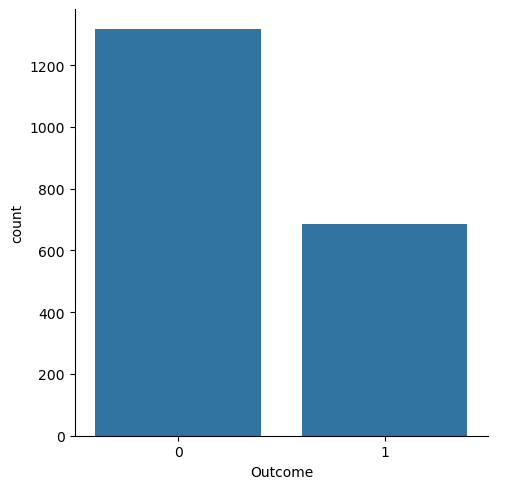

In [46]:
## checking the balance of traget
sns.catplot(x='Outcome',data=data,kind='count') # Imbalanced dataset

In [47]:
data.Outcome.value_counts()

Outcome
0    1316
1     684
Name: count, dtype: int64

In [48]:
from imblearn.over_sampling import SMOTE
smote = SMOTE() 

In [49]:
y_train.value_counts()

Outcome
0    996
1    504
Name: count, dtype: int64

In [50]:
X_train_smote, y_train_smote = smote.fit_resample(X_train.astype('float'),
                                                  y_train)

In [51]:
y=np.array(y_train_smote)

In [52]:
from collections import Counter
print("Actual Classes",Counter(y_train))
print("SMOTE Classes",Counter(y_train_smote))

Actual Classes Counter({0: 996, 1: 504})
SMOTE Classes Counter({0: 996, 1: 996})


In [57]:
knn2 = KNeighborsClassifier(n_neighbors=7)
knn2.fit(X_train_smote, y_train_smote)

KNeighborsClassifier(n_neighbors=7)

In [58]:
y_pred = knn2.predict(X_test)

In [59]:
print("The accuracy score is : ", accuracy_score(y_test,y_pred))

The accuracy score is :  0.802


In [60]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.78      0.83       320
           1       0.68      0.84      0.75       180

    accuracy                           0.80       500
   macro avg       0.79      0.81      0.79       500
weighted avg       0.82      0.80      0.81       500

